# Introduction to heuristics

- [Quantitative Methods for Logistcs- Slides](https://1drv.ms/p/s!AuEYB6vlajI42uUGY5zuLWSPDMirhA?e=dTRGfu)
- Summary of metaheuristics

In [1]:
from pprint import pprint
import itertools
import static, animated, util, heuristic, metaheuristic
import matplotlib.pyplot as plt
import seaborn as sns
import complexity
import math
sns.set_style("whitegrid")

import numpy as np
np.random.seed(7)

## Study cases

### Example 1: Random distribution

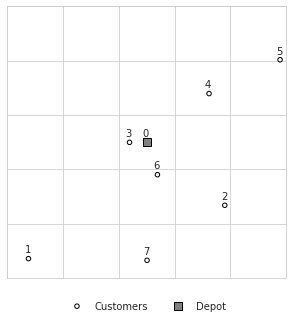

In [2]:
n_customers = 7
figsize = (5, 5)

coords = util.get_random_nodes(n_customers)
nodes = list(range(len(coords)))
depot, customer_nodes = nodes[0], nodes[1:]

static.draw_nodes(coords, nodes, figsize=figsize)

### Example 2: 48 US capitals

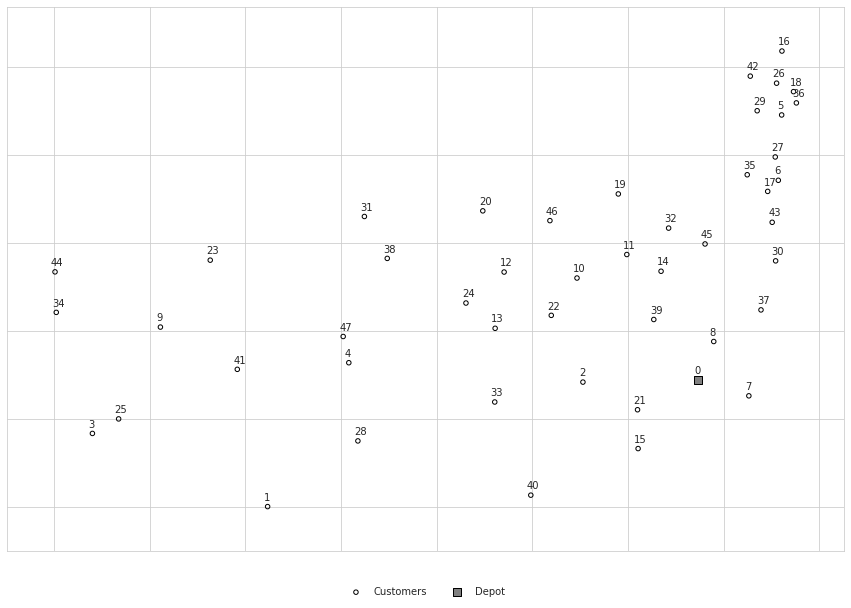

In [3]:
us_nodes, us_coords = static.get_data_us_capitals()
us_depot, us_customer_nodes = us_nodes[0], us_nodes[1:]
us_fig, us_ax = static.get_us_plot()
static.draw_nodes(us_coords, us_nodes, ax=us_ax)

## Traveling salesman problem (TSP)

### Solution approaches

#### Brute force

Check all possible routes (n customers = n! solutions):

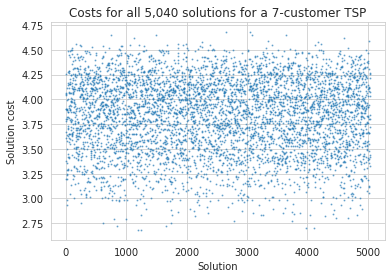

In [4]:
tsp_solutions = heuristic.get_brute_force(customer_nodes, depot=depot)
tsp_sol_costs = [util.get_total_cost(s, coords) for s in tsp_solutions]

plt.scatter(np.arange(len(tsp_solutions)), tsp_sol_costs, s=1, alpha=0.5)
plt.title(f"Costs for all {len(tsp_solutions):,} solutions for a {n_customers}-customer TSP") 
plt.ylabel("Solution cost")
_ = plt.xlabel("Solution")

The best 50 solutions:

In [5]:
tsp_sorted_sol = sorted(tsp_solutions, key=lambda s:util.get_total_cost(s, coords), reverse=True)
animated.show_solutions(tsp_sorted_sol[-50:], coords, nodes, figsize=figsize)

#### Random

Route: (0, 7, 6, 2, 1, 5, 4, 3, 0)


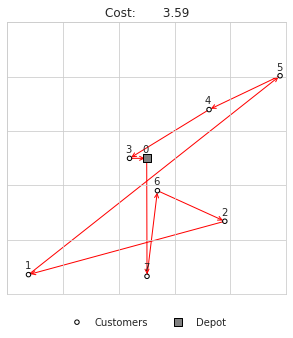

In [6]:
random_route = (0,) + tuple(np.random.permutation(np.arange(n_customers)+1)) +  (0,)
print(f"Route: {random_route}")
_ = static.construct_route(random_route, nodes, coords, figsize=figsize)

#### Construction heuristic

##### Nearest Neighbor
Randomly select a starting node and until no more node is available add the closest node to the last selected node. Finally, connect the last node with the first node.

Starting from: 0 - Route: (0, 3, 6, 2, 7, 1, 4, 5, 0)


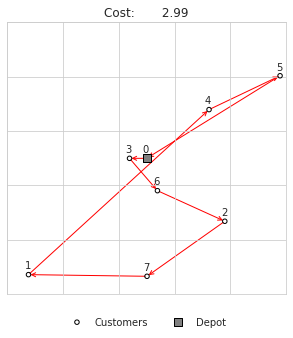

In [7]:
random_start = np.random.randint(len(nodes))
nn_route = heuristic.get_route_nearest_neighborhood(customer_nodes, coords, start=random_start)
print(f"Starting from: {random_start} - Route: {nn_route}")
_ = static.construct_route(nn_route, nodes, coords, figsize=figsize)

In [8]:
animated.construct_route(nn_route, coords, nodes, figsize=figsize)

##### Farthest addition

Starting from: 7 - Route: (0, 6, 2, 4, 5, 7, 1, 3, 0)


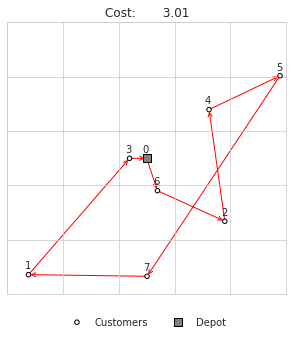

In [9]:
random_start = np.random.randint(len(nodes))
fa_route, sols = heuristic.get_route_farthest_addition(customer_nodes, coords, start=random_start)
print(f"Starting from: {random_start} - Route: {fa_route}")
fig_fa, ax_fa = static.construct_route(fa_route, nodes, coords, figsize=figsize)

Example of farthest insertion algorithm using the US capitals instance (48 nodes):

In [10]:
us_random_start = np.random.randint(len(us_nodes))
print(f"Starting from: {us_random_start}")

fa_us_route, fa_us_sol_steps = heuristic.get_route_farthest_addition(us_customer_nodes, us_coords, start=us_random_start)
print(f"Route: {fa_us_route}")

Starting from: 0
Route: (0, 7, 8, 37, 30, 43, 17, 6, 27, 29, 5, 36, 18, 26, 16, 42, 35, 45, 32, 19, 46, 20, 31, 38, 24, 12, 13, 22, 10, 11, 14, 39, 2, 21, 15, 40, 33, 47, 4, 28, 1, 41, 25, 3, 9, 23, 34, 44, 0)


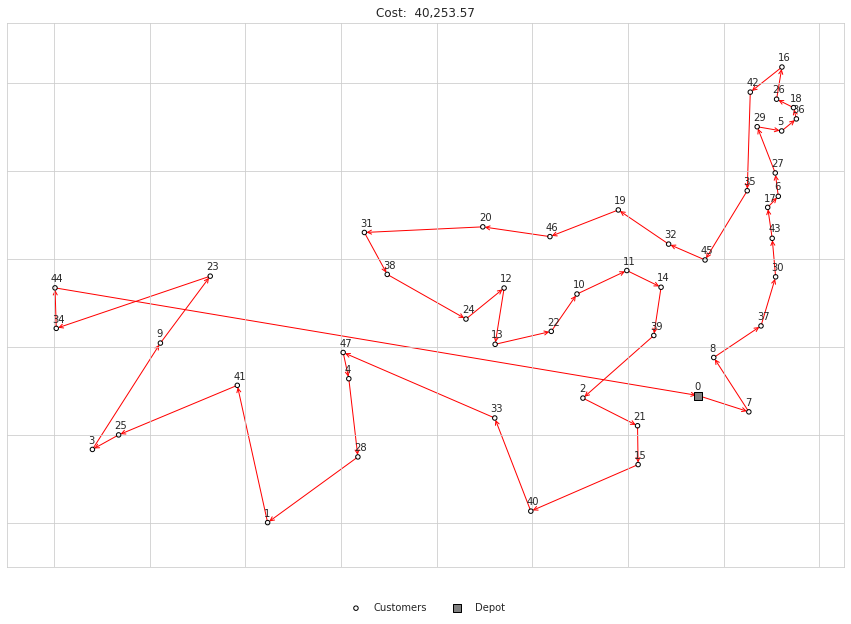

In [11]:
us_fig_fa, us_ax_fa = static.get_us_plot()
_ = static.construct_route(fa_us_route, us_nodes, us_coords, fig=us_fig_fa, ax=us_ax_fa)

In [12]:
us_fig, us_ax = static.get_us_plot()
animated.show_solutions(fa_us_sol_steps, us_coords, us_nodes, ax=us_ax, fig=us_fig)

#### Local search

##### 2-Opt

Let us apply the 2-OPT algorithm in the solution constructed using the farthest addition heuristic:

(0, 6, 2, 4, 5, 7, 1, 3, 0)


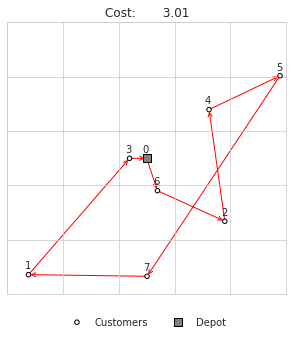

In [13]:
print(fa_route)
fig_fa

2-Opt route:

- Cost:   2.824 - Route: (0, 6, 5, 4, 2, 7, 1, 3, 0)


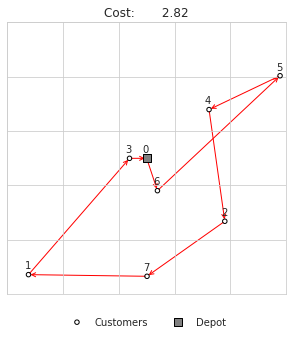

In [14]:
improved_fa_route = heuristic.get_route_2opt(fa_route, coords)
print(f"- Cost: {util.get_cost(improved_fa_route, coords):7.3f} "
      f"- Route: {improved_fa_route}")

_ = static.construct_route(improved_fa_route, nodes, coords, figsize=figsize)

#### Neighborhood search

Using the 2-OPT algorithm we can search the neighborhood of a solution until it can no longer be improved:

  0 - Cost:      2.824 
  1 - Cost:      2.722 
  2 - Cost:      2.703 
  3 - Cost:      2.683 


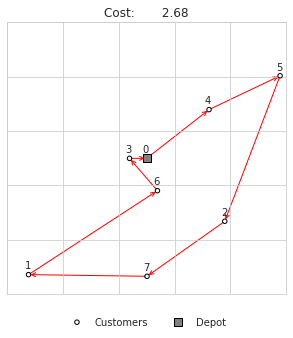

In [15]:
improved_ns_fa_route = heuristic.neighborhood_search_2opt(improved_fa_route, coords)
_ = static.construct_route(improved_ns_fa_route, nodes, coords, figsize=figsize)

Starting from a bad quality solution (e.g., random), many improvements can be made:

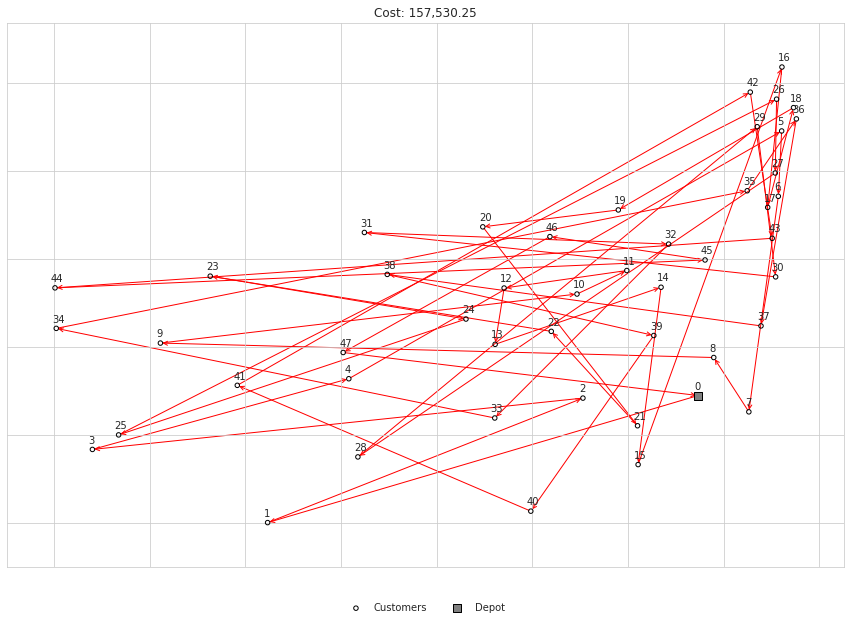

In [16]:
random_us_route = tuple([us_depot] + list(us_customer_nodes) + [us_depot])
us_fig, us_ax = static.get_us_plot()
_ = static.construct_route(random_us_route, us_nodes, us_coords, fig=us_fig, ax=us_ax)

  0 - Cost: 157,530.246 
  1 - Cost: 144,695.175 
  2 - Cost: 132,687.311 
  3 - Cost: 122,661.753 
  4 - Cost: 114,556.697 
  5 - Cost: 105,175.639 
  6 - Cost: 98,839.117 
  7 - Cost: 93,173.045 
  8 - Cost: 87,941.712 
  9 - Cost: 83,402.571 
 10 - Cost: 78,904.465 
 11 - Cost: 74,570.334 
 12 - Cost: 71,849.922 
 13 - Cost: 69,223.251 
 14 - Cost: 66,737.505 
 15 - Cost: 64,410.066 
 16 - Cost: 62,207.930 
 17 - Cost: 60,028.946 
 18 - Cost: 57,544.931 
 19 - Cost: 55,762.378 
 20 - Cost: 53,988.749 
 21 - Cost: 52,275.591 
 22 - Cost: 50,575.138 
 23 - Cost: 48,938.289 
 24 - Cost: 47,536.571 
 25 - Cost: 45,889.560 
 26 - Cost: 44,773.057 
 27 - Cost: 43,670.139 
 28 - Cost: 42,659.755 
 29 - Cost: 41,704.823 
 30 - Cost: 40,857.349 
 31 - Cost: 40,223.610 
 32 - Cost: 39,468.499 
 33 - Cost: 38,894.670 
 34 - Cost: 38,501.396 
 35 - Cost: 38,244.500 
 36 - Cost: 38,026.610 
 37 - Cost: 37,820.463 
 38 - Cost: 37,709.485 
 39 - Cost: 37,641.112 
 40 - Cost: 37,577.861 
 41 - Cost

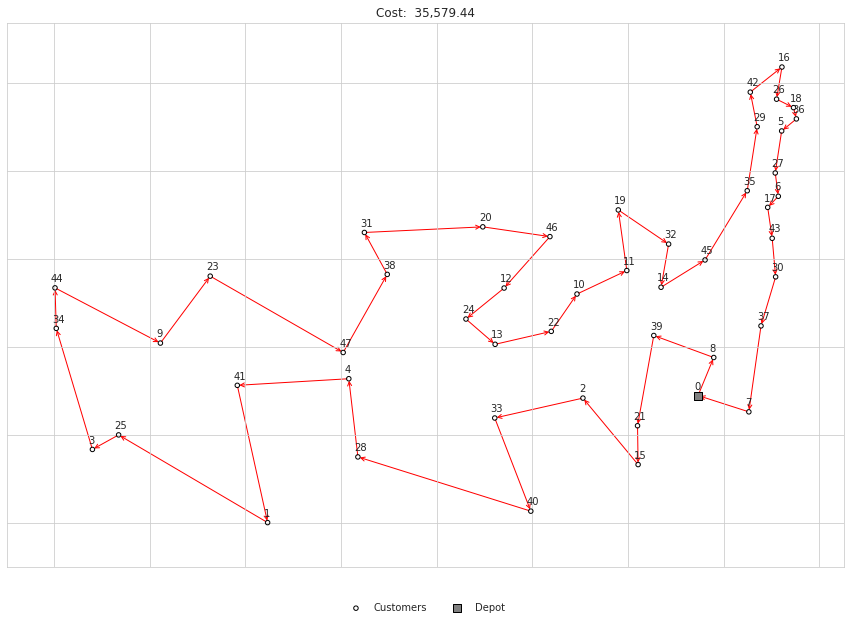

In [17]:
improved_us_route = heuristic.neighborhood_search_2opt(random_us_route, us_coords)
us_fig, us_ax = static.get_us_plot()
_ = static.construct_route(improved_us_route, us_nodes, us_coords, fig=us_fig, ax=us_ax)

Notice that the solution improved by 2-OPT is already better than the solution created by the farthest addition heuristic (cost = 40,253.57).
In the following we search the neighborhood of the FA solution instead:

  0 - Cost: 40,253.573 
  1 - Cost: 38,507.875 
  2 - Cost: 37,228.067 
  3 - Cost: 35,964.835 
  4 - Cost: 35,194.838 
  5 - Cost: 34,926.265 
  6 - Cost: 34,679.066 
  7 - Cost: 34,271.925 
  8 - Cost: 34,059.079 
  9 - Cost: 33,948.647 


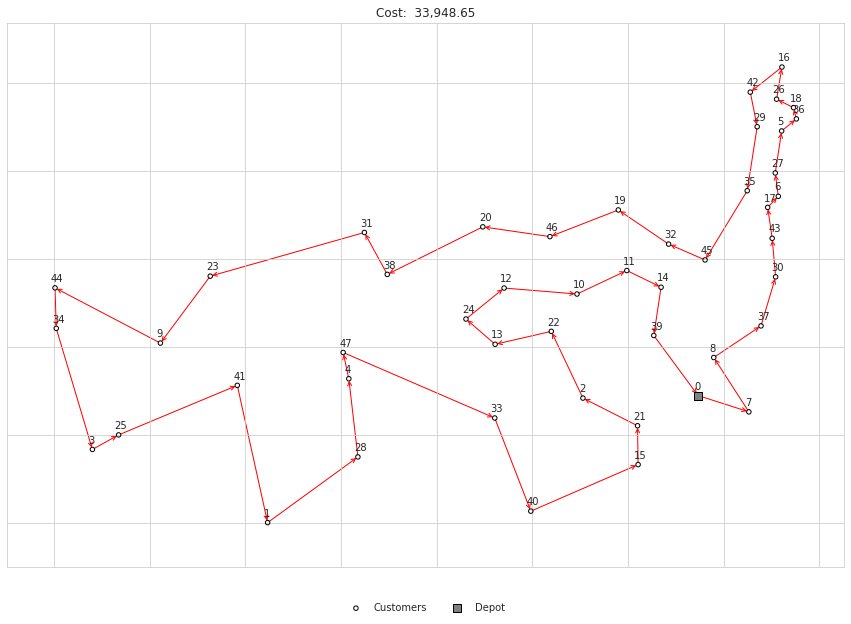

In [18]:
improved_fa_us_route = heuristic.neighborhood_search_2opt(fa_us_route, us_coords)
us_fig, us_ax = static.get_us_plot()
_ = static.construct_route(improved_fa_us_route, us_nodes, us_coords, fig=us_fig, ax=us_ax)

#### MH - Simulated Annealing

##### Acceptance criteria

Outline:

- $Z_c$ = objective function value for the current trial solution,
- $Z_n$ = objective function value for the current candidate to be the next trial solution,
- $T$ (temperature) = a control parameter that measures the tendency to accept the current candidate to be the next trial solution if this candidate is not an improvement on the current trial solution.

Move selection rule (assuming MINIMIZATION):
- If $Z_n <= Z_c$, always accept the candidate.
- If $Z_n > Z_c$, accept the candidate with the following probability:
$$
\text{Prob{acceptance} }= e^x \text{ where } x = \frac{Z_c - Z_n}{T} \text{(Boltzmann distribution)}
$$

In [19]:
def get_prob_acceptance(current_route_cost, candidate_route_cost, T):
    prob = np.exp(-(candidate_route_cost - current_route_cost)/T)
    return prob

def accept(current_route_cost, candidate_route_cost, T):
    if candidate_route_cost < current_route_cost:
        return True
    else:
        return np.random.rand() < get_prob_acceptance(current_route_cost, candidate_route_cost, T)

Below, we show the probability of acceptance for a range of candidate solutions for different values of $T$.
Notice that the probability of acceptance *increases* with higher $T$ values.

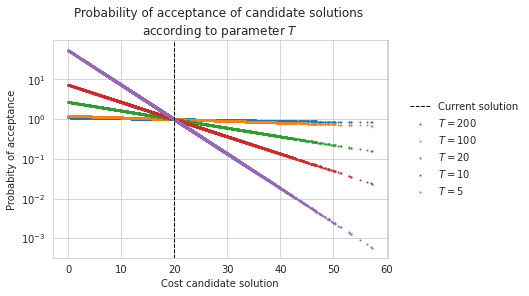

In [20]:
current_sol_cost = 20

# Random costs sampled from normal distribution
# mean = current solution and std = 10
candidate_sol_costs = np.random.normal(current_sol_cost, 10, 10000)
candidate_sol_costs = candidate_sol_costs[candidate_sol_costs >=0]

# Temperature params
temperature = [200, 100, 20, 10, 5]
prob_next_costs = dict()

for t in temperature:
    prob_next_costs[t] =  [get_prob_acceptance(current_sol_cost, n, t) for n in candidate_sol_costs]

for t in temperature:
    plt.scatter(candidate_sol_costs, prob_next_costs[t], s=1, label=f"$T={t}$")

plt.axvline(current_sol_cost, color='k', linewidth=1, label="Current solution", linestyle="--")

plt.xlabel("Cost candidate solution")
plt.ylabel("Probabity of acceptance")
plt.title("Probability of acceptance of candidate solutions \naccording to parameter $T$")
plt.yscale("log")
_ = plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", frameon=False)

For example, for $Z_c = 20$ and $Z_n = 40$ (i.e., a bad quality solution) we have:

In [21]:
for t in temperature:
    print(f"T={t:>3}: Probability of acceptance of Z_n = 40: {get_prob_acceptance(20, 40, t):5.3f}")

T=200: Probability of acceptance of Z_n = 40: 0.905
T=100: Probability of acceptance of Z_n = 40: 0.819
T= 20: Probability of acceptance of Z_n = 40: 0.368
T= 10: Probability of acceptance of Z_n = 40: 0.135
T=  5: Probability of acceptance of Z_n = 40: 0.018


##### Initial solution

We are going to compare the outcome of the SA algorithm starting from different initial solutions generated using:

- a random approach,
- the farthest addition algorithm,
- the neighborhood search algorithm (apply 2-Opt on a solution generated by the FA algorithm).

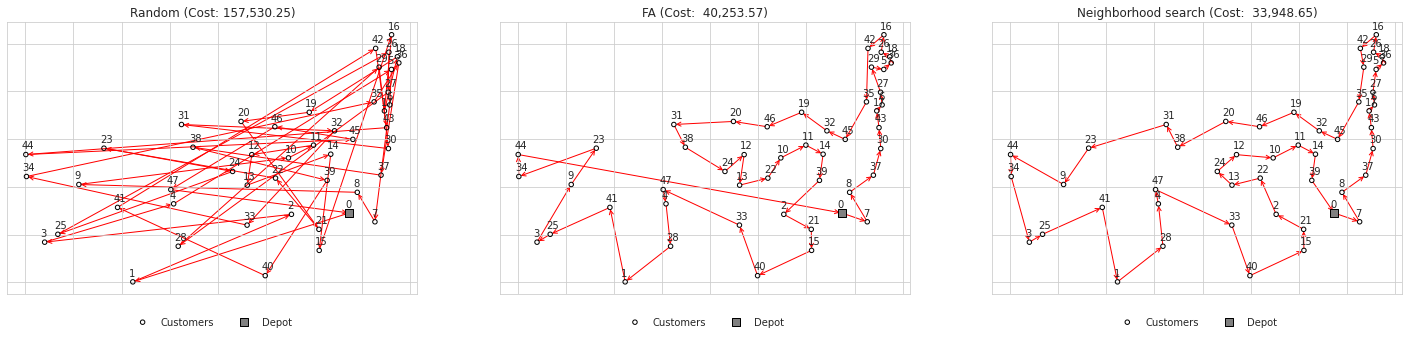

In [22]:
# Initial trial solutions
fig, ax = plt.subplots(1,3, figsize=(25,5))
_ = static.construct_route(random_us_route, us_nodes, us_coords, fig=fig, ax=ax[0], label="Random")
_ = static.construct_route(fa_us_route, us_nodes, us_coords, fig=fig, ax=ax[1], label="FA")
_ = static.construct_route(improved_fa_us_route, us_nodes, us_coords, fig=fig, ax=ax[2], label="Neighborhood search")

In [23]:
# Simulated annealing
sa_fa_us_route, costs_sa_fa = metaheuristic.simulated_annealing(fa_us_route, us_coords, initial_temperature=1000)
sa_random_us_route, costs_sa_random = metaheuristic.simulated_annealing(random_us_route, us_coords, initial_temperature=1000)
sa_improved_fa_us_route, costs_sa_improved_fa = metaheuristic.simulated_annealing(improved_fa_us_route, us_coords, initial_temperature=1000)

Solutions found by the SA algorithm:

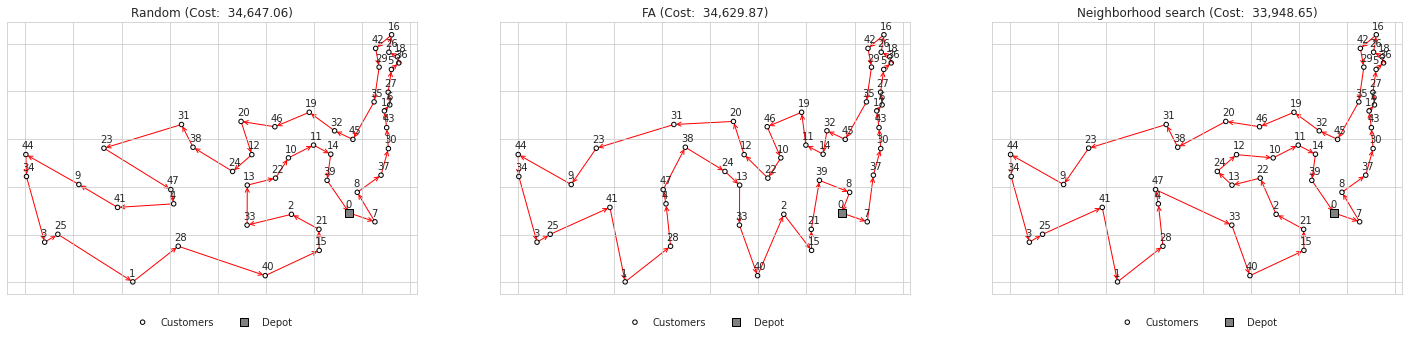

In [24]:
# Solutions after SA
fig, ax = plt.subplots(1,3, figsize=(25,5))
_ = static.construct_route(sa_random_us_route, us_nodes, us_coords, fig=fig, ax=ax[0], label="Random")
_ = static.construct_route(sa_fa_us_route, us_nodes, us_coords, fig=fig, ax=ax[1], label="FA")
_ = static.construct_route(sa_improved_fa_us_route, us_nodes, us_coords, fig=fig, ax=ax[2], label="Neighborhood search")

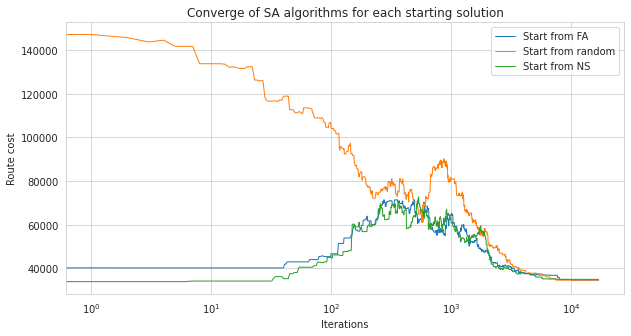

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(costs_sa_fa, label="Start from FA", linewidth=1)
plt.plot(costs_sa_random, label="Start from random", linewidth=1)
plt.plot(costs_sa_improved_fa, label="Start from NS", linewidth=1)
plt.xlabel("Iterations")
plt.ylabel("Route cost")
plt.xscale("log")
plt.legend()
_ = plt.title("Converge of SA algorithms for each starting solution")

##### Initial temperature

Performance comparison starting from different temperatures:

In [26]:
# Simulated annealing
initial_temp = [1000, 500, 200, 100, 50]
temp_costs = dict()
temp_routes = dict()
for t in initial_temp:
    temp_routes[t], temp_costs[t] = metaheuristic.simulated_annealing(improved_fa_us_route, us_coords, initial_temperature=t)

Text(0, 0.5, 'Route cost')

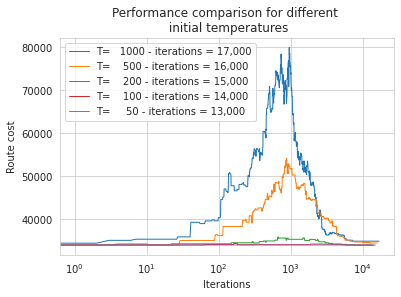

In [27]:
for t, costs in temp_costs.items():
    plt.plot(costs, label=f"T={t:>7} - iterations = {len(costs):,}", linewidth=1)
plt.legend()
plt.title("Performance comparison for different \n initial temperatures")
plt.xscale("log")
plt.legend(loc="upper left")
plt.xlabel("Iterations")
plt.ylabel("Route cost")

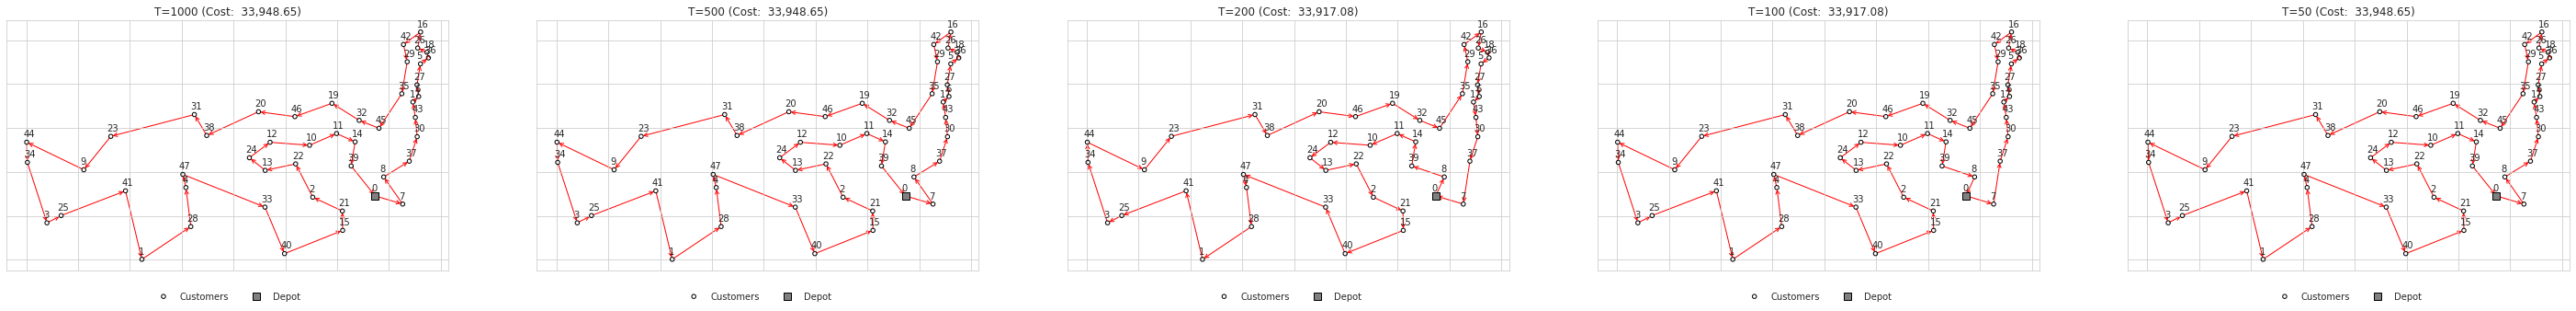

In [28]:
fig, ax = plt.subplots(1,len(temp_routes), figsize=(10*len(temp_routes),5))
for i, (t, route) in enumerate(temp_routes.items()):
    _ = static.construct_route(route, us_nodes, us_coords, fig=fig, ax=ax[i], label=f"T={t}")

We use the best route (T=200) to try a new iteration count. Previosly, the SA would spend 1,000 iterations at each temperature, now we set this value to 3,000:

In [29]:
 route_3000_it, _ = metaheuristic.simulated_annealing(temp_routes[200], us_coords, max_iterations_at_current_temp=3000, initial_temperature=200)

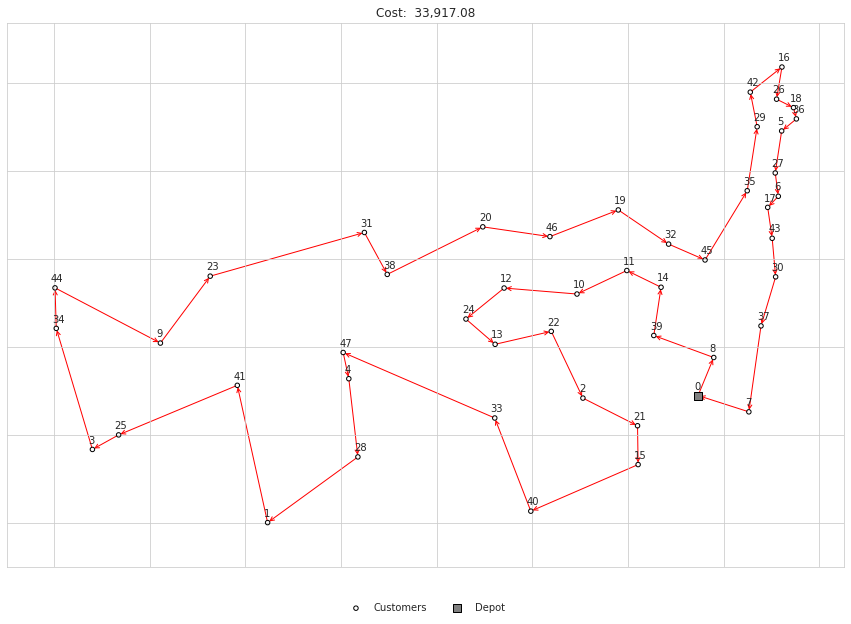

In [30]:
us_fig, us_ax = static.get_us_plot()
_ = static.construct_route( route_3000_it, us_nodes, us_coords, fig=us_fig, ax=us_ax)

## Vehicle Routing Problem (VRP)

### Complexity

> How many ways can $k$ vehicles pick up $n$ customers?

Let us assume customers 1, 2, 3, and 4 (i.e., $n=4$) must picked picked up by vehicles 1, 2, and 3 (i.e., $k=3$):

| Vehicle 1 | Vehicle 2 | Vehicle 3 | Way                                                                                   | Representation      |
|:---------:|:---------:|:--------: |---------------------------------------------------------------------------------------|---------------------|
| 🧍 🧍 🧍 🧍 |           |           | Customers 1,2,3, and 4 picked up by Vehicle 1                                         | `((1,2,3,4),(),())` |
|   🧍 🧍 🧍 |     🧍     |           | Customers 1,2, and 3 picked up by Vehicle 1 and customer 4 picked up by Vehicle 2     | `((1,2,3),(4),())`  |
|    🧍 🧍   |    🧍 🧍   |           | Customers 1 and 2 picked up by vehicle 1 and customers 3 and 4 picked up by Vehicle 2 | `((1,2),(3,4),())`  |

Using the [stars and bars](https://en.wikipedia.org/wiki/Stars_and_bars_(combinatorics)) method, the solutions presented above could be represented as

- "🧍🧍🧍🧍┃┃",
- "🧍🧍🧍┃🧍┃, and
- "🧍🧍┃🧍🧍┃".

The bars "┃" mark the separation between customers being serviced by different vehicles. Notice that one fewer bar is used since there is no need to service more customers after the last user.

The number of ways to distribute customers to vehicles correspond to the number of ways symbols '🧍🧍🧍🧍┃┃' can be combined.
With 7 symbols, we must choose 2 of them to be customer separators. Thus:

There are ${6 \choose 2} = 15$ ways to distribute $4$ customers to $3$ vehicles (or, alternatively, 15 ways of choosing 2 symbols among 6 to be separators).

The ways are as follows:

In [31]:
n = 4 # n. of customers
k = 3 # n. of vehicles
customers = ['🧍'] * n
separations = ["┃"] * (k - 1) # 3 vehicles = 2 separations
symbols = customers + separations

# Transformation to set exclude duplicate permutations
ways = set(itertools.permutations(symbols))


print(f"k={4} vehicles can pick up n={n} customers in {len(ways)} different ways.\n")
print("# Ways (vehicles are separated by '|'):")
complexity.enumerate_ways(ways)

k=4 vehicles can pick up n=4 customers in 15 different ways.

# Ways (vehicles are separated by '|'):
  1  ┃┃🧍🧍🧍🧍
  2  ┃🧍┃🧍🧍🧍
  3  ┃🧍🧍┃🧍🧍
  4  ┃🧍🧍🧍┃🧍
  5  ┃🧍🧍🧍🧍┃
  6  🧍┃┃🧍🧍🧍
  7  🧍┃🧍┃🧍🧍
  8  🧍┃🧍🧍┃🧍
  9  🧍┃🧍🧍🧍┃
 10  🧍🧍┃┃🧍🧍
 11  🧍🧍┃🧍┃🧍
 12  🧍🧍┃🧍🧍┃
 13  🧍🧍🧍┃┃🧍
 14  🧍🧍🧍┃🧍┃
 15  🧍🧍🧍🧍┃┃


The number of ways is given by the formula:

$${n + k - 1 \choose k - 1} = \frac{(n + k - 1)!}{(k-1)!(n+k-1-(k-1)!} = \frac{(n + k - 1)!}{(k-1)!n!,}$$

which can be applied using the `math.comb` function:

In [32]:
import math
n_ways = math.comb(n+k-1,k-1)
print(f"k={k} vehicles can pick up n={n} customers in {n_ways} different ways.\n")

k=3 vehicles can pick up n=4 customers in 15 different ways.



Knowing how many ways customers can be assigned to vehicles, we can also calculate the total number of possible assignments, that is:

> In how many ways $k$ vehicles can pick up $n$ customers?

Similarly to the TSP (a one-vehicle VRP) $n$ customers can be visited in $n!$ ways.
Each possible customer permutation can be further divided into ${n + k - 1 \choose k - 1}$ ways using the '┃' separators.

For example, the sequence of visits `(1,2,3,4)` can be split among 3 vehicles as follows:

In [33]:
ways_1234 = complexity.get_ways_to_split_list_in_kbins((1,2,3,4), 3)
complexity.enumerate_ways(ways_1234)

  1  1234┃┃
  2  123┃4┃
  3  123┃┃4
  4  12┃34┃
  5  12┃3┃4
  6  12┃┃34
  7  1┃234┃
  8  1┃23┃4
  9  1┃2┃34
 10  1┃┃234
 11  ┃1234┃
 12  ┃123┃4
 13  ┃12┃34
 14  ┃1┃234
 15  ┃┃1234


Therefore, $k=3$ vehicles can pickup $n=4$ customers in $4!{6 \choose 2} =  12 \times 15 = 360$ ways.

the total number of schedules is given by the formula:

$$n!{n + k - 1 \choose k - 1} = n! \frac{(n + k - 1)!}{(k-1)!n!} = \frac{(n + k - 1)!}{(k-1)!}$$    

#### Sulution space


Below, the solution space (total number of possible schedules) for different combinations of n. of customers and n. of vehicles:

In [34]:
import pandas as pd
from scipy.special import comb
from decimal import Decimal

k_list = [3, 5, 10]
n_list = [5, 10, 30, 50, 100]
nk_dict = []
for n,k in itertools.product(n_list, k_list):
    nk_schedules = math.factorial(n+k-1)/math.factorial(k-1)
    if nk_schedules < 10**12: # Show zeros for "smaller" values
        nk_dict.append((n, k, f"{int(nk_schedules):,}"))
    else: # Show scientific notation
        nk_dict.append((n, k, f"{Decimal(nk_schedules):.2E}"))

pd.DataFrame(nk_dict, columns=["n. of customers", "n. of vehicles", "n. of schedules"]).set_index(["n. of customers", "n. of vehicles"])

n. of schedules
n. of customers n. of vehicles                 
5               3                         2,520
                5                        15,120
                10                      240,240
10              3                   239,500,800
                5                 3,632,428,800
                10              335,221,286,400
30              3                      1.32E+35
                5                      1.23E+37
                10                     5.62E+40
50              3                      4.03E+67
                5                      9.62E+69
                10                     3.82E+74
100             3                     4.81E+161
                5                     4.29E+164
                10                    3.98E+170

Typically, exact algorithms can solve to optimality relatively small instances involving around 100 customers.

#### Questions

- How the solution space changes if *time window* and *capacity* constraints are considered (i.e., CVRP, VRPTW)?
- How the solution space changes if we consider customer *pickups and deliveries* (i.e., VRPPD)?

### Solution approaches

#### Brute force

In [35]:
n_vehicles = 3
n_customers = 4
coords = util.get_random_nodes(n_customers)
nodes = list(range(len(coords)))
depot, customer_nodes = nodes[0], nodes[1:]

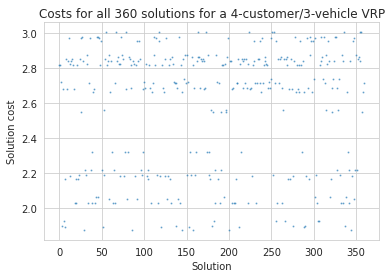

In [36]:
vrp_solutions = heuristic.get_brute_force(customer_nodes, depot=depot, n_vehicles=n_vehicles)
vrp_sol_costs = [util.get_total_cost(s, coords) for s in vrp_solutions]

plt.scatter(np.arange(len(vrp_sol_costs)), vrp_sol_costs, s=1, alpha=0.5)
plt.title(f"Costs for all {len(vrp_solutions):,} solutions for a {n_customers}-customer/{n_vehicles}-vehicle VRP") 
plt.ylabel("Solution cost")

_ = plt.xlabel("Solution")

The sulutions assume vehicles are *distinguishable*, for example, if $k=3$ and $n=4$, the following routes are different:
- `((), (0, 1, 0), (0, 2, 3, 4, 0))`,
- `((), (0, 2, 3, 4, 0), (0, 1, 0))`,
- `((0, 1, 0), (0, 2, 3, 4, 0), ())`,
- `((0, 1, 0), (), (0, 2, 3, 4, 0))`,
- `((0, 2, 3, 4, 0), (), (0, 1, 0))`, and
- `((0, 2, 3, 4, 0), (0, 1, 0), ())`.

Format: (`route_V1`, `route_V2`, `route_V3`).

If vehicles are *undistinguishable* we have:

In [37]:
vrp_solutions_undistinguishable = heuristic.get_brute_force(
    customer_nodes,
    depot=depot,
    n_vehicles=n_vehicles,
    distinguish_vehicles=False)

print(f"{n_customers}-customer/{n_vehicles}-vehicle "
      f"VRP solutions (undistinguishable vehicles) = "
      f"{len(vrp_solutions_undistinguishable):,}")

4-customer/3-vehicle VRP solutions (undistinguishable vehicles) = 72


In [38]:
vrp_sorted_sol = sorted(
    vrp_solutions_undistinguishable,
    key=lambda s:util.get_total_cost(s, coords),
    reverse=True)

animated.show_solutions(vrp_sorted_sol[-100:], coords, nodes)